In [1]:
from bs4 import BeautifulSoup
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.ptt.cc/'
#下面的網址可填入任何一個版，我是以e-shopping版、graduate版、PhD和AfterPhD版為基準
web = requests.get('https://www.ptt.cc/bbs/AfterPhD/index.html', cookies={'over18':'1'})
#第一關保險：預置Cookies作為通關密碼
soup = BeautifulSoup(web.text, "html.parser")
titles = soup.find_all('div', class_='title')   
# 取得 class 為 title 的 div 內容
# 基本參數
payload = {
    'from': '/bbs/Gossiping/index.html',
    'yes': 'yes'
}
data = []   # 全部文章的資料
num = 0
#第二關保險：用session紀錄cookie訊息
rs = requests.session()
response = rs.post("https://www.ptt.cc/ask/over18", data=payload)

In [3]:
urls = '' # 建立代表所有網址(但沒有分行)的urls變數
for i in range(10): #讀取幾頁的網址，這裡是10頁
    for i in titles:
            urls = urls + url + i.find('a')['href'] + '\n'
            web = "https://www.ptt.cc"+soup.find("a", string="‹ 上頁")["href"]
            #迴圈結束時按下上一頁按鈕，次數同迴圈圈數

In [4]:
urlsList = urls.split('\n') #將所有要找尋的網址以\n為基準分段、並存成一維陣列

In [5]:
hourList=[]
for i in range(len(urlsList)-2):
    page_url = urlsList[i]
    response = rs.get(page_url)
    result = BeautifulSoup(response.text, "html.parser")
    #print(result.prettify())
    # 找出作者、標題、時間、留言
    main_content = result.find("div", id="main-content")
    article_info = main_content.find_all("span",class_="article-meta-value")
    #將函數存成時間字串
    time = article_info[3].string
    time_obj = datetime.datetime.strptime(time, '%a %b %d %H:%M:%S %Y')
    hour_str = time_obj.strftime('%H')
    hourList.append(hour_str)

In [6]:
hourList

['23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '13',
 '10',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '13',
 '10',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '13',
 '10',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '13',
 '10',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '13',
 '10',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '13',
 '10',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '13',
 '10',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '13',
 '10',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '13',
 '10',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '13',
 '10',
 '23']

In [7]:
import pandas as pd

# 將 hourList 轉換為 Pandas Series
hourSeries = pd.Series(hourList)

# 使用 value_counts() 方法計算每個小時出現的次數
hourCounts = hourSeries.value_counts()

print(hourCounts)

23    99
13    10
10    10
dtype: int64


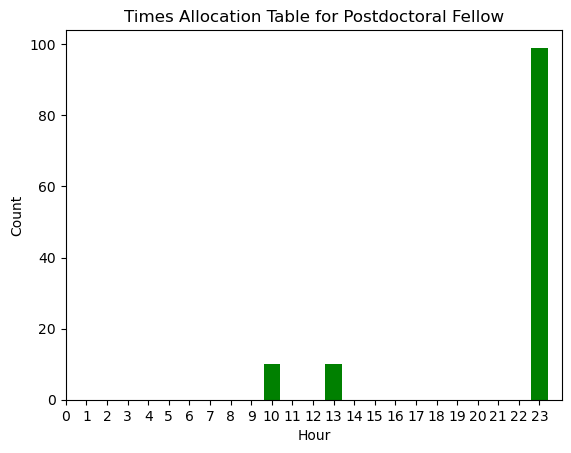

In [15]:
# 繪製長條圖，可用color=''修改顏色
plt.bar(hourCounts.index.astype(int), hourCounts.values, color='green')

# 設置圖表標題和軸標籤
plt.title('Times Allocation Table for Postdoctoral Fellow')
plt.xlabel('Hour')
plt.ylabel('Count')

# 設置 X 軸刻度
plt.xticks(range(0, 24))

# 顯示圖表
plt.show()

In [9]:
#純爬蟲的部分大致在上面，我將數據轉成csv與json放在下面
hourList=[]
df = {'title':[],'author':[],'time':[]}
for i in range(len(urlsList)-2):
    page_url = urlsList[i]
    response = rs.get(page_url)
    result = BeautifulSoup(response.text, "html.parser")
    #print(result.prettify())
    main_content = result.find("div", id="main-content")
    article_info = main_content.find_all("span",class_="article-meta-value")
    #將函數存成時間、標題、作者
    time = article_info[3].string
    title = article_info[2].string
    author = article_info[0].string
    print(title,author,time)
    df.get('title').append([title])
    df.get('author').append([author])
    df.get('time').append([time])

[新聞] 反雙語政策連署2天逾5千人 教育部：同步 zkow (逍遙山水憶秋年) Sat Apr 15 23:56:38 2023
[新聞] 維也納大學校長任期平均不到1年 黃榮村： zkow (逍遙山水憶秋年) Sat Apr 15 23:57:31 2023
[新聞] 私校招生出奇招 個申二階分數「倒著打」 zkow (逍遙山水憶秋年) Sun Apr 16 23:56:01 2023
[新聞] 頂尖師資+先進設備 長庚大學延攬世界人才 zkow (逍遙山水憶秋年) Sun Apr 16 23:57:18 2023
[新聞] 師憂雙語教學困境 國發會：萬事起頭難 zkow (逍遙山水憶秋年) Sun Apr 16 23:58:43 2023
[新聞] 日本大學教授傳學術醜聞　捏造論文數據超 zkow (逍遙山水憶秋年) Mon Apr 17 23:10:55 2023
[新聞] 學術界最高榮譽國家講座主持人頒獎 zkow (逍遙山水憶秋年) Mon Apr 17 23:13:02 2023
[新聞] 陸大學畢業生賺多少？ 報告曝光：「2領域 zkow (逍遙山水憶秋年) Mon Apr 17 23:14:10 2023
[新聞] 選舉成揪論文抄襲大戰 監察院立案調查防 zkow (逍遙山水憶秋年) Tue Apr 18 13:44:15 2023
Re: [討論] 教職應徵人數之統計 tainanuser (南南南) Mon Jun 29 10:57:48 2009
[板規] 板規注意事項, 請先閱讀... cscc (一奈米一世界) Sat May 28 23:19:44 2011
[公告] 代po服務 cscc (一奈米一世界) Sat May 28 23:34:09 2011
[新聞] 反雙語政策連署2天逾5千人 教育部：同步 zkow (逍遙山水憶秋年) Sat Apr 15 23:56:38 2023
[新聞] 維也納大學校長任期平均不到1年 黃榮村： zkow (逍遙山水憶秋年) Sat Apr 15 23:57:31 2023
[新聞] 私校招生出奇招 個申二階分數「倒著打」 zkow (逍遙山水憶秋年) Sun Apr 16 23:56:01 2023
[新聞] 頂尖師資+先進設備 長庚大學延攬世界人才 zkow (逍遙山水憶秋年) Sun Ap

In [10]:
#轉成 DataFrame
df = pd.DataFrame(df)
df

,title,author,time
0,[[新聞] 反雙語政策連署2天逾5千人 教育部：同步],[zkow (逍遙山水憶秋年)],[Sat Apr 15 23:56:38 2023]
1,[[新聞] 維也納大學校長任期平均不到1年 黃榮村：],[zkow (逍遙山水憶秋年)],[Sat Apr 15 23:57:31 2023]
2,[[新聞] 私校招生出奇招 個申二階分數「倒著打」],[zkow (逍遙山水憶秋年)],[Sun Apr 16 23:56:01 2023]
3,[[新聞] 頂尖師資+先進設備 長庚大學延攬世界人才],[zkow (逍遙山水憶秋年)],[Sun Apr 16 23:57:18 2023]
4,[[新聞] 師憂雙語教學困境 國發會：萬事起頭難],[zkow (逍遙山水憶秋年)],[Sun Apr 16 23:58:43 2023]
...,...,...,...
114,[[新聞] 學術界最高榮譽國家講座主持人頒獎],[zkow (逍遙山水憶秋年)],[Mon Apr 17 23:13:02 2023]
115,[[新聞] 陸大學畢業生賺多少？ 報告曝光：「2領域],[zkow (逍遙山水憶秋年)],[Mon Apr 17 23:14:10 2023]
116,[[新聞] 選舉成揪論文抄襲大戰 監察院立案調查防],[zkow (逍遙山水憶秋年)],[Tue Apr 18 13:44:15 2023]
117,[Re: [討論] 教職應徵人數之統計],[tainanuser (南南南)],[Mon Jun 29 10:57:48 2009]


In [11]:
#輸出EXCEL檔
df.to_csv('Excel_df.csv')
print("csv輸出成功")

csv輸出成功


In [12]:
df = df.to_json()
#轉為json檔
with open('json_df.json', 'w', encoding='utf-8') as file:
    json.dump(df, file, ensure_ascii=False)  

print("json輸出成功")

json輸出成功
